In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the raw data file
df = pd.read_excel("WDIEXCEL.xlsx", sheet_name = "Data")

In [3]:
#sample the data
df.sample(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
321556,Somalia,SOM,Firms offering formal training (% of firms),IC.FRM.TRNG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101948,Bolivia,BOL,Public and publicly guaranteed debt service (%...,DT.TDS.DPPG.XP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.496816,3.569761,2.204074,2.630001,5.244918,5.527484,5.920016,6.412504,7.508764,NaN
315156,Singapore,SGP,"Self-employed, male (% of male employment) (mo...",SL.EMP.SELF.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.209999,18.565001,18.113001,17.995001,17.549000,17.749001,18.434000,17.525999,17.499001,17.480000
341007,Syrian Arab Republic,SYR,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.154916,18.348222,18.623743,18.931185,19.199771,19.348576,19.533016,19.657959,19.490278,19.322817
62030,Sub-Saharan Africa (excluding high income),SSA,Bank liquid reserves to bank assets ratio (%),FD.RES.LIQU.AS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.151870,18.400683,21.042459,19.467645,18.540601,18.718436,19.676497,19.151238,16.794686,NaN
259833,Morocco,MAR,Informal payments to public officials (% of fi...,IC.FRM.CORR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.900000,NaN,NaN,NaN,NaN,NaN,38.400000,NaN
33152,Latin America & the Caribbean (IDA & IBRD coun...,TLA,Adjusted savings: consumption of fixed capital...,NY.ADJ.DKAP.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,12.102778,12.092707,12.165570,12.168196,12.977287,13.235124,13.328811,13.865428,NaN,NaN
354493,Turkmenistan,TKM,Coverage of social safety net programs in 4th ...,per_sa_allsa.cov_q4_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235551,Luxembourg,LUX,"Net bilateral aid flows from DAC donors, Japan...",DC.DAC.JPNL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196521,India,IND,"Labor force with advanced education, male (% o...",SL.TLF.ADVN.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,82.959000,NaN,NaN,NaN,NaN,NaN,79.931099,NaN,NaN


In [4]:
#check to confirm there are no missing values in the indicator code column
#because we will filter countries based on this code
df.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960              342527
                   ...  
2016              172632
2017              188422
2018              207180
2019              271505
2020              366138
Length: 65, dtype: int64

These are the variable of interest that could have an impact on life expectancy.

#Birth rate, crude (per 1,000 people)	SP.DYN.CBRT.IN
#Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)	SH.DTH.COMM.ZS
#Cause of death, by non-communicable diseases (% of total)	SH.DTH.NCOM.ZS
#Current health expenditure (% of GDP)	SH.XPD.CHEX.GD.ZS
#Death rate, crude (per 1,000 people)	SP.DYN.CDRT.IN
#Fertility rate, total (births per woman)	SP.DYN.TFRT.IN
#Hospital beds (per 1,000 people)	SH.MED.BEDS.ZS
#Immunization, DPT (% of children ages 12-23 months)	SH.IMM.IDPT
#Immunization, HepB3 (% of one-year-old children)	SH.IMM.HEPB
#Immunization, measles (% of children ages 12-23 months)	SH.IMM.MEAS
#Incidence of HIV, all (per 1,000 uninfected population)	SH.HIV.INCD.TL.P3
#Incidence of tuberculosis (per 100,000 people)	SH.TBS.INCD
#Intentional homicides (per 100,000 people)	VC.IHR.PSRC.P5
#Life expectancy at birth, total (years)	SP.DYN.LE00.IN
#Mortality caused by road traffic injury (per 100,000 people)	SH.STA.TRAF.P5
#Physicians (per 1,000 people)	SH.MED.PHYS.ZS
#Population density (people per sq. km of land area)	EN.POP.DNST
#Prevalence of overweight, weight for height (% of children under 5)	SH.STA.OWGH.ZS
#Smoking prevalence, total (ages 15+)	SH.PRV.SMOK
#Suicide mortality rate (per 100,000 population)	SH.STA.SUIC.P5
#Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)	SH.ALC.PCAP.LI

In [5]:
#drop all dates from 1960 to 1982 and 2019 and 2020 (no data for last 2 years)
df = df.drop(columns=['1960', '1961', '1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972', '1973', '1974', '1975','1976', '1977','1978', '1979','1980', '1981','1982', '2019', '2020'])

In [6]:
#check dataframe shape
df.shape

(380160, 40)

In [7]:
#check data head
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.809630,82.368101,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,84.270921,86.959991,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,70.506461,75.816160,75.958878,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,95.065438,96.290866,96.466418,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN


In [8]:
#check whether the "Country Name" column has only countries name.
df["Country Name"].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

"Country Name" column seems to have grouped region names in addition to country names. So, lets remove all the rows which have broader region in the dataset.

In [9]:
#create a list with all the row values that needs to be removed. We are removing the rows that have data about regions of
#the world because we are only interested in countries
row_values_to_remove = ['Arab World', 
'Caribbean small states',                        
'Central Europe and the Baltics', 
'East Asia & Pacific (excluding high income)',
'Early-demographic dividend', 'East Asia & Pacific',
'Europe & Central Asia (excluding high income)',
'Europe & Central Asia','Euro area',
'European Union', 'Fragile and conflict affected situations',
'High income', 
'Heavily indebted poor countries (HIPC)', 
'IBRD only', 'IDA & IBRD total', 'IDA total',
'IDA blend', 'IDA only', 
'Not classified', 
'Latin America & Caribbean (excluding high income)',
'Latin America & Caribbean',
'Least developed countries: UN classification', 'Low income',
'Lower middle income',
'Low & middle income', 'Late-demographic dividend',
'Middle East & North Africa',
'Middle East & North Africa (excluding high income)', 
'North America', 
'OECD members',
'Other small states', 
'Pre-demographic dividend',
'West Bank and Gaza', 'Pacific island small states',
'South Asia',
'Sub-Saharan Africa (excluding high income)', 
'Sub-Saharan Africa', 'Small states', 'Sao Tome and Principe',
'East Asia & Pacific (IDA & IBRD countries)',
'Europe & Central Asia (IDA & IBRD countries)', 
'Latin America & the Caribbean (IDA & IBRD countries)',
'Middle East & North Africa (IDA & IBRD countries)',
'South Asia (IDA & IBRD)',
'Sub-Saharan Africa (IDA & IBRD countries)', 
'Upper middle income']

In [10]:
#create a for loop to iterate over the length of the list and remove rows with each value from list in each iteratation
for i in range(len(row_values_to_remove)):
    df = df[df["Country Name"] != row_values_to_remove[i]]

In [11]:
df.shape

(313920, 40)

In [12]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
44640,Middle income,MIC,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,49.910055,50.969163,51.823360,52.726853,53.620460,54.377912,55.116218,55.873792,NaN,NaN
44641,Middle income,MIC,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,84.440735,85.185685,83.861522,87.029842,87.420190,88.117307,89.602320,90.805687,91.866787,92.802279
44642,Middle income,MIC,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,74.828766,75.174306,72.252407,77.818497,78.322205,79.058975,81.786036,83.713277,85.396189,87.221490
44643,Middle income,MIC,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.759187,96.702970,96.820774,97.177708,97.184018,97.225950,97.346635,97.972897,98.308204,98.306550
44644,Middle income,MIC,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,43.443604,NaN,NaN,57.535599,NaN,NaN,65.312920,NaN


In [13]:
#create a new column called mean and add mean value of all the years per row to that column

df['mean'] = df.iloc[:, 4:].mean(skipna = True, axis =1)

In [14]:
#verify adding 'mean' column worked. It should have 41 columns
df.shape

(313920, 41)

In [15]:
#df_2018.head()

In [16]:
#drop all 'country name' and 'country code' columns.

df = df.drop(list(df)[0:3], axis = 1)

In [17]:
#verify dropped columns worked
df.head()

,Indicator Code,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,mean
44640,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.969163,51.823360,52.726853,53.620460,54.377912,55.116218,55.873792,NaN,NaN,48.940668
44641,EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.185685,83.861522,87.029842,87.420190,88.117307,89.602320,90.805687,91.866787,92.802279,84.353860
44642,EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.174306,72.252407,77.818497,78.322205,79.058975,81.786036,83.713277,85.396189,87.221490,74.562609
44643,EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.702970,96.820774,97.177708,97.184018,97.225950,97.346635,97.972897,98.308204,98.306550,96.362885
44644,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,43.443604,NaN,NaN,57.535599,NaN,NaN,65.312920,NaN,55.430707


In [18]:
#df.shape

In [19]:
#drop all the columns with data related to individual year
df = df.drop(list(df)[1:37], axis = 1)

In [20]:
#verify dataframe has only mean values and category code  
df.head(5)

,Indicator Code,mean
44640,EG.CFT.ACCS.ZS,48.940668
44641,EG.ELC.ACCS.ZS,84.353860
44642,EG.ELC.ACCS.RU.ZS,74.562609
44643,EG.ELC.ACCS.UR.ZS,96.362885
44644,FX.OWN.TOTL.ZS,55.430707


In [21]:
#df_2018.shape

In [22]:
#extract values of variables of interest into separate series 
crude_birth_rate = df.loc[df['Indicator Code'] == 'SP.DYN.CBRT.IN','mean'].reset_index(drop = True)
death_comm_disease = df.loc[df['Indicator Code'] == 'SH.DTH.COMM.ZS','mean'].reset_index(drop = True)
death_noncomm_disease = df.loc[df['Indicator Code'] == 'SH.DTH.NCOM.ZS','mean'].reset_index(drop = True)
health_expenditure = df.loc[df['Indicator Code'] == 'SH.XPD.CHEX.GD.ZS','mean'].reset_index(drop = True)
crude_death_rate = df.loc[df['Indicator Code'] == 'SP.DYN.CDRT.IN','mean'].reset_index(drop = True)
fertility_rate = df.loc[df['Indicator Code'] == 'SP.DYN.TFRT.IN','mean'].reset_index(drop = True)
hospital_bed = df.loc[df['Indicator Code'] == 'SH.MED.BEDS.ZS','mean'].reset_index(drop = True)
DPT_immu = df.loc[df['Indicator Code'] == 'SH.IMM.IDPT','mean'].reset_index(drop = True)
HepB3_immu = df.loc[df['Indicator Code'] == 'SH.IMM.HEPB','mean'].reset_index(drop = True)
measles_immu = df.loc[df['Indicator Code'] == 'SH.IMM.MEAS','mean'].reset_index(drop = True)
HIV_incidence = df.loc[df['Indicator Code'] == 'SH.HIV.INCD.TL.P3','mean'].reset_index(drop = True)
TB_incidence = df.loc[df['Indicator Code'] == 'SH.TBS.INCD','mean'].reset_index(drop = True)
homicides_per100000 = df.loc[df['Indicator Code'] == 'VC.IHR.PSRC.P5','mean'].reset_index(drop = True)
life_expectancy = df.loc[df['Indicator Code'] == 'SP.DYN.LE00.IN','mean'].reset_index(drop = True)
road_traffic_mortality = df.loc[df['Indicator Code'] == 'SH.STA.TRAF.P5','mean'].reset_index(drop = True)
physicians_per1000_people = df.loc[df['Indicator Code'] == 'SH.MED.PHYS.ZS','mean'].reset_index(drop = True)
population_density = df.loc[df['Indicator Code'] == 'EN.POP.DNST','mean'].reset_index(drop = True)
overweight_prevalence = df.loc[df['Indicator Code'] == 'SH.STA.OWGH.ZS','mean'].reset_index(drop = True)
smoking_prevalence = df.loc[df['Indicator Code'] == 'SH.PRV.SMOK','mean'].reset_index(drop = True)
suicide_per1000000 = df.loc[df['Indicator Code'] == 'SH.STA.SUIC.P5','mean'].reset_index(drop = True)
alcohol_consumption_per_capita = df.loc[df['Indicator Code'] == 'SH.ALC.PCAP.LI','mean'].reset_index(drop = True)


In [23]:
#reassign each variable into a series so we can use them to create our dataframe
crude_birth_rate = pd.Series(crude_birth_rate)
death_comm_disease = pd.Series(death_comm_disease)
death_noncomm_disease = pd.Series(death_noncomm_disease)
health_expenditure = pd.Series(health_expenditure)
crude_death_rate = pd.Series(crude_death_rate)
fertility_rate = pd.Series(fertility_rate)
hospital_bed = pd.Series(hospital_bed)
DPT_immu = pd.Series(DPT_immu)
HepB3_immu = pd.Series(HepB3_immu)
measles_immu = pd.Series(measles_immu)
HIV_incidence = pd.Series(HIV_incidence)
TB_incidence = pd.Series(TB_incidence)
homicides_per100000 = pd.Series(homicides_per100000)
life_expectancy = pd.Series(life_expectancy)
road_traffic_mortality = pd.Series(road_traffic_mortality)
physicians_per1000_people = pd.Series(physicians_per1000_people)
population_density = pd.Series(population_density)
overweight_prevalence = pd.Series(overweight_prevalence)
smoking_prevalence = pd.Series(smoking_prevalence)
suicide_per1000000 = pd.Series(suicide_per1000000)
alcohol_consumption_per_capita = pd.Series(alcohol_consumption_per_capita)

In [24]:
#verify each series is same length
crude_birth_rate.shape,death_comm_disease.shape,health_expenditure.shape,crude_death_rate.shape,fertility_rate.shape,hospital_bed.shape,DPT_immu.shape, HepB3_immu.shape,measles_immu.shape,HIV_incidence.shape,TB_incidence.shape,homicides_per100000.shape,life_expectancy.shape,road_traffic_mortality.shape, physicians_per1000_people.shape,population_density.shape,overweight_prevalence.shape,smoking_prevalence.shape,suicide_per1000000.shape,alcohol_consumption_per_capita.shape 


((218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,))

In [25]:
#create a variable to store all variables to create a dataframe
frame = {'Crude_birth_rate':crude_birth_rate, 
         'Death_comm_disease':death_comm_disease,  
         'Death_noncomm_disease':death_noncomm_disease,
         'Health_expenditure':health_expenditure,
         'Crude_death_rate':crude_death_rate,
         'Fertility_rate':fertility_rate,
         'Hospital_bed':hospital_bed,  
         'DPT_immu':DPT_immu,  
         'HepB3_immu':HepB3_immu,  
         'Measles_immu':measles_immu,
         'HIV_incidence':HIV_incidence,  
         'TB_incidence':TB_incidence,  
         'Homicides_per100000':homicides_per100000,  
         'Life_expectancy':life_expectancy,  
         'Road_traffic_mortality':road_traffic_mortality,  
         'Physicians_per1000_people':physicians_per1000_people,  
         'Population_density':population_density,  
         'Overweight_prevalence':overweight_prevalence,  
         'Smoking_prevalence':smoking_prevalence,  
         'Suicide_per1000000':suicide_per1000000,  
         'Alcohol_consumption_per_capita':alcohol_consumption_per_capita
        }

In [26]:
#create the dataframe
result = pd.DataFrame(frame).reset_index(drop = True)

In [27]:
#check the dataframe
result.head(10)


,Crude_birth_rate,Death_comm_disease,Death_noncomm_disease,Health_expenditure,Crude_death_rate,Fertility_rate,Hospital_bed,DPT_immu,HepB3_immu,Measles_immu,...,TB_incidence,Homicides_per100000,Life_expectancy,Road_traffic_mortality,Physicians_per1000_people,Population_density,Overweight_prevalence,Smoking_prevalence,Suicide_per1000000,Alcohol_consumption_per_capita
0,23.121256,24.044739,66.791261,5.091871,8.194539,2.861601,2.535885,73.253847,74.505322,74.192327,...,177.157895,6.066667,66.801882,18.888738,1.157813,58.032949,5.753846,22.107752,11.459531,5.803673
1,11.854447,6.297173,88.067905,11.439419,9.123033,1.653865,6.477148,91.871139,85.098229,88.024549,...,NaN,2.133333,77.548180,7.519247,2.789725,32.470175,NaN,27.339052,15.819962,10.124687
2,22.383797,23.963126,67.307581,9.400137,8.559036,2.831325,3.244981,73.110659,75.197420,72.868729,...,156.526316,6.512147,67.995788,17.779256,1.357511,48.239116,5.269231,22.630512,11.613697,6.371288
3,44.612306,47.150000,39.175000,9.684495,11.779111,6.764611,0.403272,40.333333,65.000000,40.750000,...,189.052632,5.912825,55.812556,15.300000,0.202200,34.076443,5.125000,NaN,5.320000,0.200000
4,17.783806,4.100000,90.550000,NaN,6.403139,2.280306,3.410560,96.694444,97.360000,93.888889,...,18.315789,7.007821,74.286556,14.350000,1.319781,110.788087,20.800000,30.744444,6.460000,7.700000
5,26.450750,16.650000,72.775000,4.838878,5.495250,3.550111,2.248037,88.529412,90.800000,86.029412,...,74.210526,1.109717,70.753389,23.800000,1.103231,13.139957,12.833333,15.511111,3.520000,0.800000
6,18.600000,NaN,NaN,NaN,4.433333,NaN,NaN,NaN,NaN,NaN,...,6.884211,6.087003,NaN,NaN,0.776500,263.926250,NaN,NaN,NaN,NaN
7,10.903571,NaN,NaN,9.350076,3.490000,1.226000,2.905455,96.636364,88.681818,96.181818,...,9.921053,0.369804,NaN,7.600000,2.939167,143.250118,NaN,34.677778,NaN,11.350000
8,47.491528,67.550000,23.950000,2.996014,15.870000,6.638417,1.045650,36.500000,51.333333,47.750000,...,359.736842,4.601430,49.901222,25.250000,0.094700,14.384626,2.550000,NaN,6.100000,7.700000
9,18.073611,12.800000,80.600000,4.962953,6.426556,2.079639,3.067800,97.833333,97.555556,92.694444,...,5.036842,8.220261,73.748389,7.300000,1.329756,174.082765,NaN,NaN,0.960000,6.550000


There are still columns with NaN values. Lets impute those values with mean of respective columns.

In [28]:
#load dataframe 
df = result.copy()

In [29]:
#check for NaN values in df
df.isna().sum()

Crude_birth_rate                   6
Death_comm_disease                33
Death_noncomm_disease             33
Health_expenditure                28
Crude_death_rate                   6
Fertility_rate                     9
Hospital_bed                      19
DPT_immu                          24
HepB3_immu                        32
Measles_immu                      24
HIV_incidence                     99
TB_incidence                       9
Homicides_per100000               25
Life_expectancy                    9
Road_traffic_mortality            27
Physicians_per1000_people         12
Population_density                 2
Overweight_prevalence             69
Smoking_prevalence                69
Suicide_per1000000                33
Alcohol_consumption_per_capita    29
dtype: int64

HIV_incidence, Overweight_prevalence and smoking_prevalence seem to have too many NaN values. Depending upon how the EDA goes, we might have to drop those columns off.

In [30]:
#check dataframe shape
df.shape

(218, 21)

In [31]:
#check quick summary of dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Crude_birth_rate,212.0,24.326763,11.225835,9.226667,14.069924,22.273607,32.541215,52.553306
Death_comm_disease,185.0,24.660162,22.156231,1.775000,6.550000,14.450000,42.325000,69.525000
Death_noncomm_disease,185.0,66.365766,23.151564,21.725000,45.550000,73.000000,86.900000,94.525000
Health_expenditure,190.0,6.319352,2.625615,1.986693,4.441887,5.727469,8.184203,16.878881
Crude_death_rate,212.0,8.886020,3.441778,1.782694,6.382167,8.436736,10.632507,20.663472
Fertility_rate,209.0,3.275595,1.627852,1.187333,1.842417,2.861601,4.428222,7.591667
Hospital_bed,199.0,3.682881,3.080343,0.234813,1.362633,2.701300,5.378254,17.923140
DPT_immu,194.0,80.893562,15.784894,25.277778,73.132994,86.356481,92.907792,99.000000
HepB3_immu,186.0,82.553103,13.672456,36.181818,75.329884,87.489583,92.907407,99.000000
Measles_immu,194.0,79.684786,14.777022,30.142857,72.720833,84.013889,90.708333,99.000000


In [32]:
#lets replace NaN values with mean of respective columns
column_means = df.mean()
df = df.fillna(column_means)

In [33]:
#verify there are no NaN values in the dataframe
df.isna().sum()

Crude_birth_rate                  0
Death_comm_disease                0
Death_noncomm_disease             0
Health_expenditure                0
Crude_death_rate                  0
Fertility_rate                    0
Hospital_bed                      0
DPT_immu                          0
HepB3_immu                        0
Measles_immu                      0
HIV_incidence                     0
TB_incidence                      0
Homicides_per100000               0
Life_expectancy                   0
Road_traffic_mortality            0
Physicians_per1000_people         0
Population_density                0
Overweight_prevalence             0
Smoking_prevalence                0
Suicide_per1000000                0
Alcohol_consumption_per_capita    0
dtype: int64

In [34]:
#check how much the data summary changed after imputation
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Crude_birth_rate,218.0,24.326763,11.069552,9.226667,14.274097,22.530903,32.254493,52.553306
Death_comm_disease,218.0,24.660162,20.402103,1.775000,7.887500,19.675000,32.368750,69.525000
Death_noncomm_disease,218.0,66.365766,21.318635,21.725000,56.743750,68.462500,83.493750,94.525000
Health_expenditure,218.0,6.319352,2.450373,1.986693,4.798431,6.319352,7.598725,16.878881
Crude_death_rate,218.0,8.886020,3.393863,1.782694,6.432708,8.516806,10.598882,20.663472
Fertility_rate,218.0,3.275595,1.593737,1.187333,1.869903,2.923708,4.303854,7.591667
Hospital_bed,218.0,3.682881,2.942401,0.234813,1.487028,2.990708,4.945696,17.923140
DPT_immu,218.0,80.893562,14.886427,25.277778,75.770833,84.236111,91.972222,99.000000
HepB3_immu,218.0,82.553103,12.624161,36.181818,78.090909,85.010653,91.055958,99.000000
Measles_immu,218.0,79.684786,13.935922,30.142857,73.742262,82.150000,89.430556,99.000000


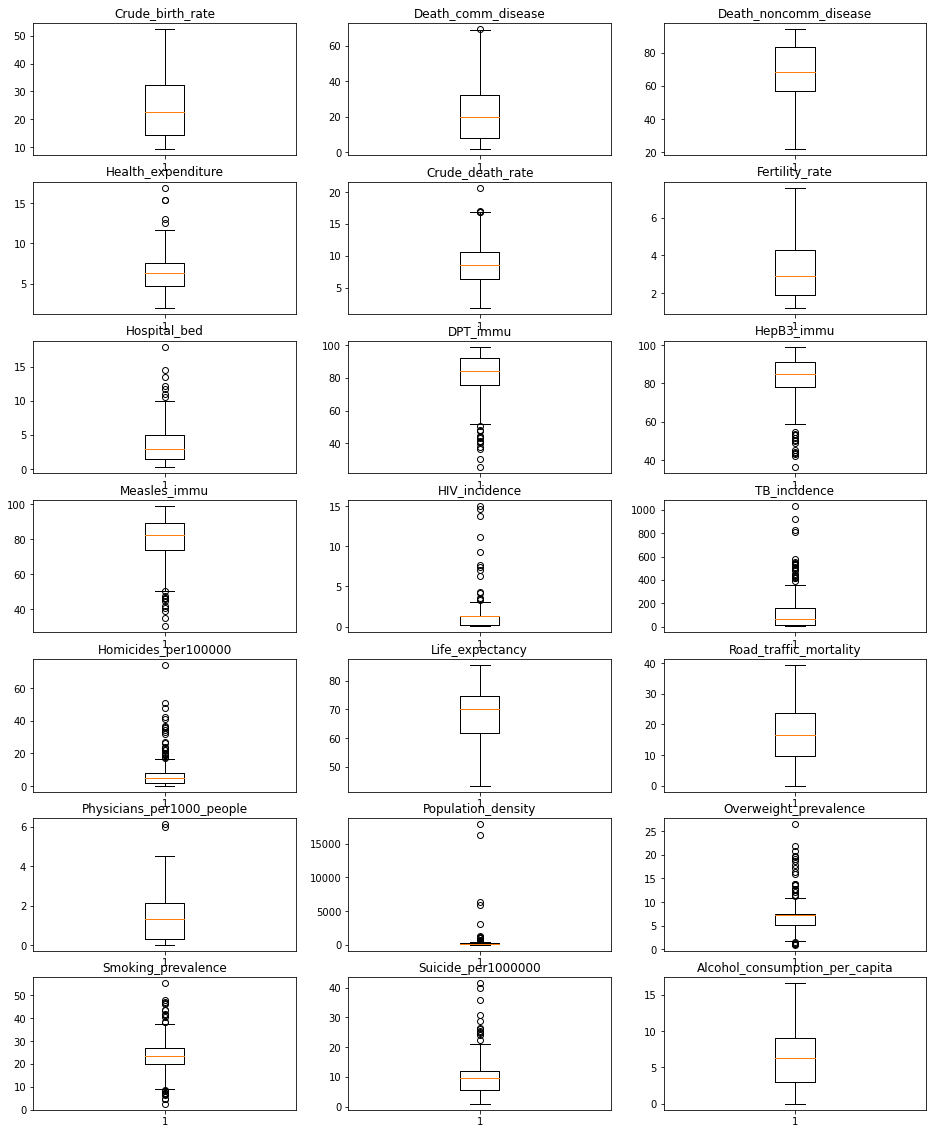

In [35]:
#check distribution of each variable in the dataframe

fig, axs = plt.subplots(7, 3, figsize=(16,20))
b = 0
for i in range(7):
    for j in range(3):
        axs[i,j].boxplot(df.iloc[:, b])
        #axs[1, 2].set_title('change whisker length')
        col_name = df.columns[b]
        axs[i,j].set_title(col_name)
        b= b + 1

plt.show()
        

array([[<AxesSubplot:title={'center':'Alcohol_consumption_per_capita'}>,
        <AxesSubplot:title={'center':'Crude_birth_rate'}>,
        <AxesSubplot:title={'center':'Crude_death_rate'}>,
        <AxesSubplot:title={'center':'DPT_immu'}>,
        <AxesSubplot:title={'center':'Death_comm_disease'}>],
       [<AxesSubplot:title={'center':'Death_noncomm_disease'}>,
        <AxesSubplot:title={'center':'Fertility_rate'}>,
        <AxesSubplot:title={'center':'HIV_incidence'}>,
        <AxesSubplot:title={'center':'Health_expenditure'}>,
        <AxesSubplot:title={'center':'HepB3_immu'}>],
       [<AxesSubplot:title={'center':'Homicides_per100000'}>,
        <AxesSubplot:title={'center':'Hospital_bed'}>,
        <AxesSubplot:title={'center':'Life_expectancy'}>,
        <AxesSubplot:title={'center':'Measles_immu'}>,
        <AxesSubplot:title={'center':'Overweight_prevalence'}>],
       [<AxesSubplot:title={'center':'Physicians_per1000_people'}>,
        <AxesSubplot:title={'center':'Pop

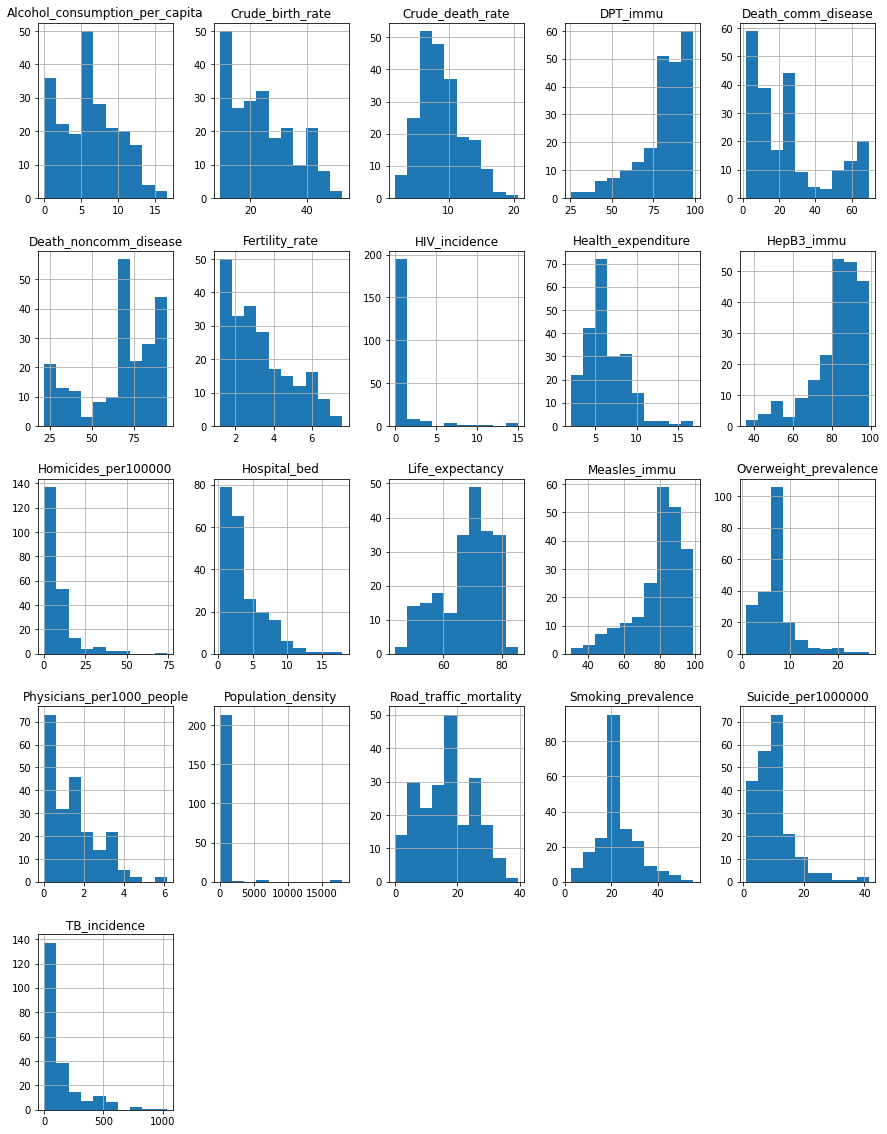

In [36]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

#https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184
EDA checklist
1. What question(s) are you trying to solve (or prove wrong)?
We are trying to predict life expectancy based on number of different socio-economic factors

2. What kind of data do you have and how do you treat different types?
All data types are numeric. They are at different scales. We might have to scale the data before using models. No feature engineering or one-hot encoding required for this dataset.


3. What’s missing from the data and how do you deal with it?
Missing data has been replaced with average of the respective columns.

4. Where are the outliers and why should you care about them?
Need to check the outliers. make histograms for each variables of interest.
Keeping outliers in your dataset may turn out in your model overfitting (being too accurate). Removing all the outliers may result in your model being too generalised (it doesn’t do well on anything out of the ordinary). As always, best to experiment iteratively to find the best way to deal with outliers.

5. How can you add, change or remove features to get more out of your data?
Need to check for multicollinearity

In [37]:
#sample dataset
df.sample(10)

,Crude_birth_rate,Death_comm_disease,Death_noncomm_disease,Health_expenditure,Crude_death_rate,Fertility_rate,Hospital_bed,DPT_immu,HepB3_immu,Measles_immu,...,TB_incidence,Homicides_per100000,Life_expectancy,Road_traffic_mortality,Physicians_per1000_people,Population_density,Overweight_prevalence,Smoking_prevalence,Suicide_per1000000,Alcohol_consumption_per_capita
10,19.914722,14.425,79.100,8.115803,7.908056,2.629083,4.418430,85.277778,87.235294,91.333333,...,28.368421,6.491178,73.549583,13.80,3.147533,13.515249,11.500000,27.388889,9.04,9.55
25,28.196250,26.275,62.125,3.827350,9.675944,3.779722,1.574156,83.805556,90.000000,81.444444,...,195.052632,2.590643,60.815222,16.25,0.258120,14.874699,5.100000,23.620653,11.74,0.90
45,21.934250,11.000,70.300,6.602870,5.430528,2.549500,1.298150,81.694444,87.291667,83.194444,...,32.842105,50.995671,72.809750,17.65,1.528300,35.610307,4.783333,12.077778,7.40,5.40
56,11.616667,5.775,90.050,9.584558,10.661111,1.708056,4.745161,91.611111,82.553103,88.781250,...,7.442105,1.034964,77.133062,3.75,3.195107,126.827462,7.174237,24.577778,13.92,10.65
189,11.836111,5.250,89.925,9.304769,10.311111,1.806667,4.920000,98.527778,53.000000,95.583333,...,6.463158,1.052390,79.653577,2.80,3.260045,21.987810,7.174237,22.888889,15.56,9.35
204,46.877306,62.875,26.725,8.838155,14.010306,6.546917,0.847371,59.027778,74.647059,60.138889,...,222.578947,9.863301,51.065250,28.20,0.085770,127.110893,4.277778,12.100000,10.38,11.35
88,32.123667,19.975,61.050,7.828181,5.650361,4.081306,0.856350,88.083333,94.631579,88.027778,...,54.684211,47.886130,70.090556,17.05,0.601450,59.997481,3.900000,2.544444,2.60,3.95
57,31.729417,51.775,38.225,4.439581,9.872917,4.563806,1.641515,58.305556,77.500000,56.583333,...,486.000000,7.763340,58.586528,24.70,0.189540,30.531396,8.250000,14.455556,6.00,0.60
90,10.316667,1.775,92.900,7.323082,13.486111,1.507500,7.830000,99.000000,82.553103,99.000000,...,18.221053,2.150117,71.944187,7.75,3.116711,113.460649,7.174237,33.833333,24.92,11.75
141,30.552639,32.275,57.525,4.852185,9.621556,3.817861,0.496218,67.527778,74.937500,67.861111,...,160.526316,2.801442,61.391722,16.45,0.212075,161.667082,1.028571,27.155556,11.26,2.05


In [38]:
#reorder the dependent variable "Life_expectancy" to the end of the dataframe
df1 = df.pop("Life_expectancy") #remove column "Life_expectancy"
df["Life_expectancy"] = df1 #add "Life_expectancy" series as a new column

In [39]:
#verify reordering worked
df.head(3)

,Crude_birth_rate,Death_comm_disease,Death_noncomm_disease,Health_expenditure,Crude_death_rate,Fertility_rate,Hospital_bed,DPT_immu,HepB3_immu,Measles_immu,...,TB_incidence,Homicides_per100000,Road_traffic_mortality,Physicians_per1000_people,Population_density,Overweight_prevalence,Smoking_prevalence,Suicide_per1000000,Alcohol_consumption_per_capita,Life_expectancy
0,23.121256,24.044739,66.791261,5.091871,8.194539,2.861601,2.535885,73.253847,74.505322,74.192327,...,177.157895,6.066667,18.888738,1.157813,58.032949,5.753846,22.107752,11.459531,5.803673,66.801882
1,11.854447,6.297173,88.067905,11.439419,9.123033,1.653865,6.477148,91.871139,85.098229,88.024549,...,129.420463,2.133333,7.519247,2.789725,32.470175,7.174237,27.339052,15.819962,10.124687,77.548180
2,22.383797,23.963126,67.307581,9.400137,8.559036,2.831325,3.244981,73.110659,75.197420,72.868729,...,156.526316,6.512147,17.779256,1.357511,48.239116,5.269231,22.630512,11.613697,6.371288,67.995788


Before moving into Machine learning lets perform some exploratory data analysis. Lets check the correlation between all our independent and dependent variables using a heatmap



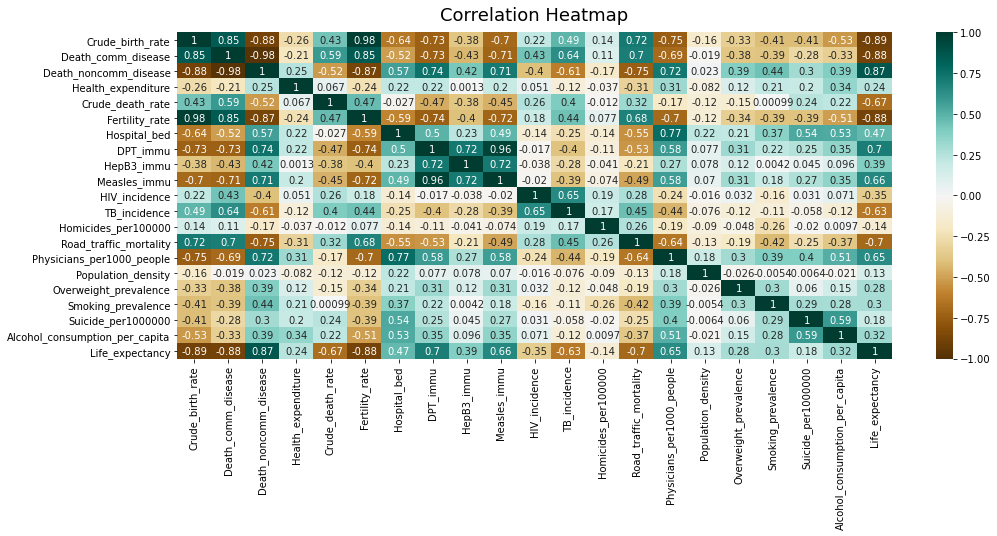

In [40]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

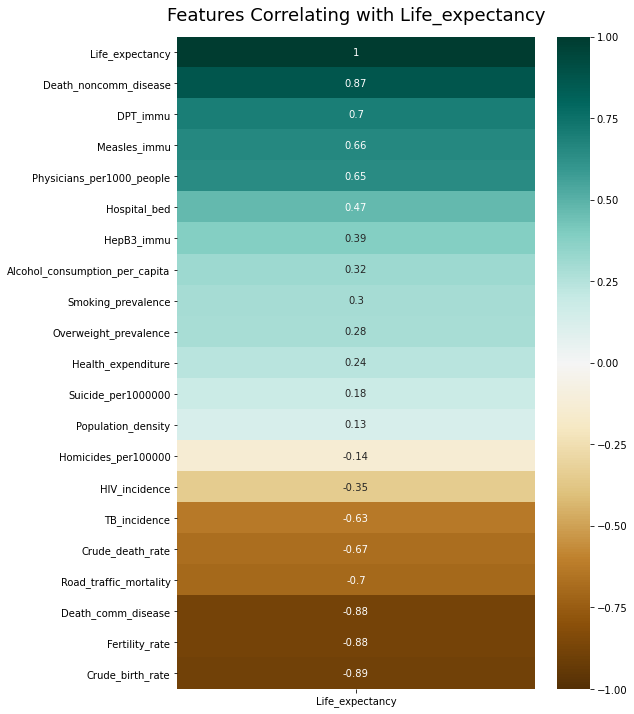

In [41]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Life_expectancy']].sort_values(by='Life_expectancy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Life_expectancy', fontdict={'fontsize':18}, pad=16);

Based on the heatmap and the correlation coefficient values, it appears that using Measles_immu, Physicians_per1000_people, Hospital_bed, HepB3_immu, TB_incidence, Crude_death_rate, Road traffic mortality, Death by communicable diseases,  Fertility_rate, and Crude_birth_rate look suitable features to predict lifeexpectancy in any country. So, lets create a new dataframe that we will use for machine learning algorithms.


We will be using Death_noncomm_disease, DPT_immu, road_traffic_mortality, death_comm_disease and crude_birth_rate to build our model because these are the most features have are high correlation with life expectancy (r2 > 0.7 or r2 < -0.7). We are ignoring fertility rate in this model because birth_rate is an outcome of fertility rate and they are highly positively correlation. So, we will try to reduce multicollinearity from our model.

In [42]:

ML_df = df[['DPT_immu', 'Crude_death_rate', 'Road_traffic_mortality','Death_comm_disease','Crude_birth_rate', 'Life_expectancy']].copy()

In [43]:
ML_df.shape



(218, 6)

In [44]:
#save the dataframe for ML
ML_df.to_csv("demographics_data.csv", index = False)


In [45]:
#load the dataframe
df = pd.read_csv("demographics_data.csv")

In [46]:
df.head()

,DPT_immu,Crude_death_rate,Road_traffic_mortality,Death_comm_disease,Crude_birth_rate,Life_expectancy
0,73.253847,8.194539,18.888738,24.044739,23.121256,66.801882
1,91.871139,9.123033,7.519247,6.297173,11.854447,77.548180
2,73.110659,8.559036,17.779256,23.963126,22.383797,67.995788
3,40.333333,11.779111,15.300000,47.150000,44.612306,55.812556
4,96.694444,6.403139,14.350000,4.100000,17.783806,74.286556


In [47]:
df.shape

(218, 6)

In [48]:
# Load libraries
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
#descriptions
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DPT_immu,218.0,80.893562,14.886427,25.277778,75.770833,84.236111,91.972222,99.000000
Crude_death_rate,218.0,8.886020,3.393863,1.782694,6.432708,8.516806,10.598882,20.663472
Road_traffic_mortality,218.0,16.588048,8.441308,0.000000,9.537500,16.588048,23.737500,39.400000
Death_comm_disease,218.0,24.660162,20.402103,1.775000,7.887500,19.675000,32.368750,69.525000
Crude_birth_rate,218.0,24.326763,11.069552,9.226667,14.274097,22.530903,32.254493,52.553306
Life_expectancy,218.0,68.089948,9.017345,43.502611,61.624743,70.100722,74.482910,85.417073


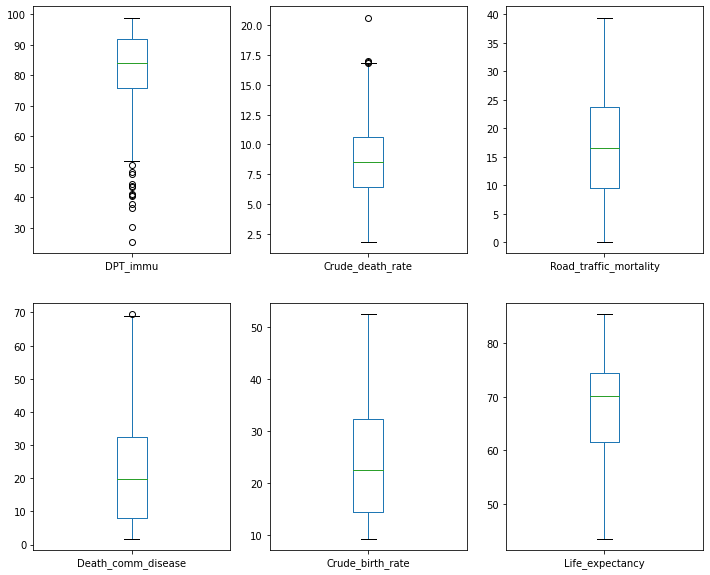

In [50]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize = (12,10))
plt.show()

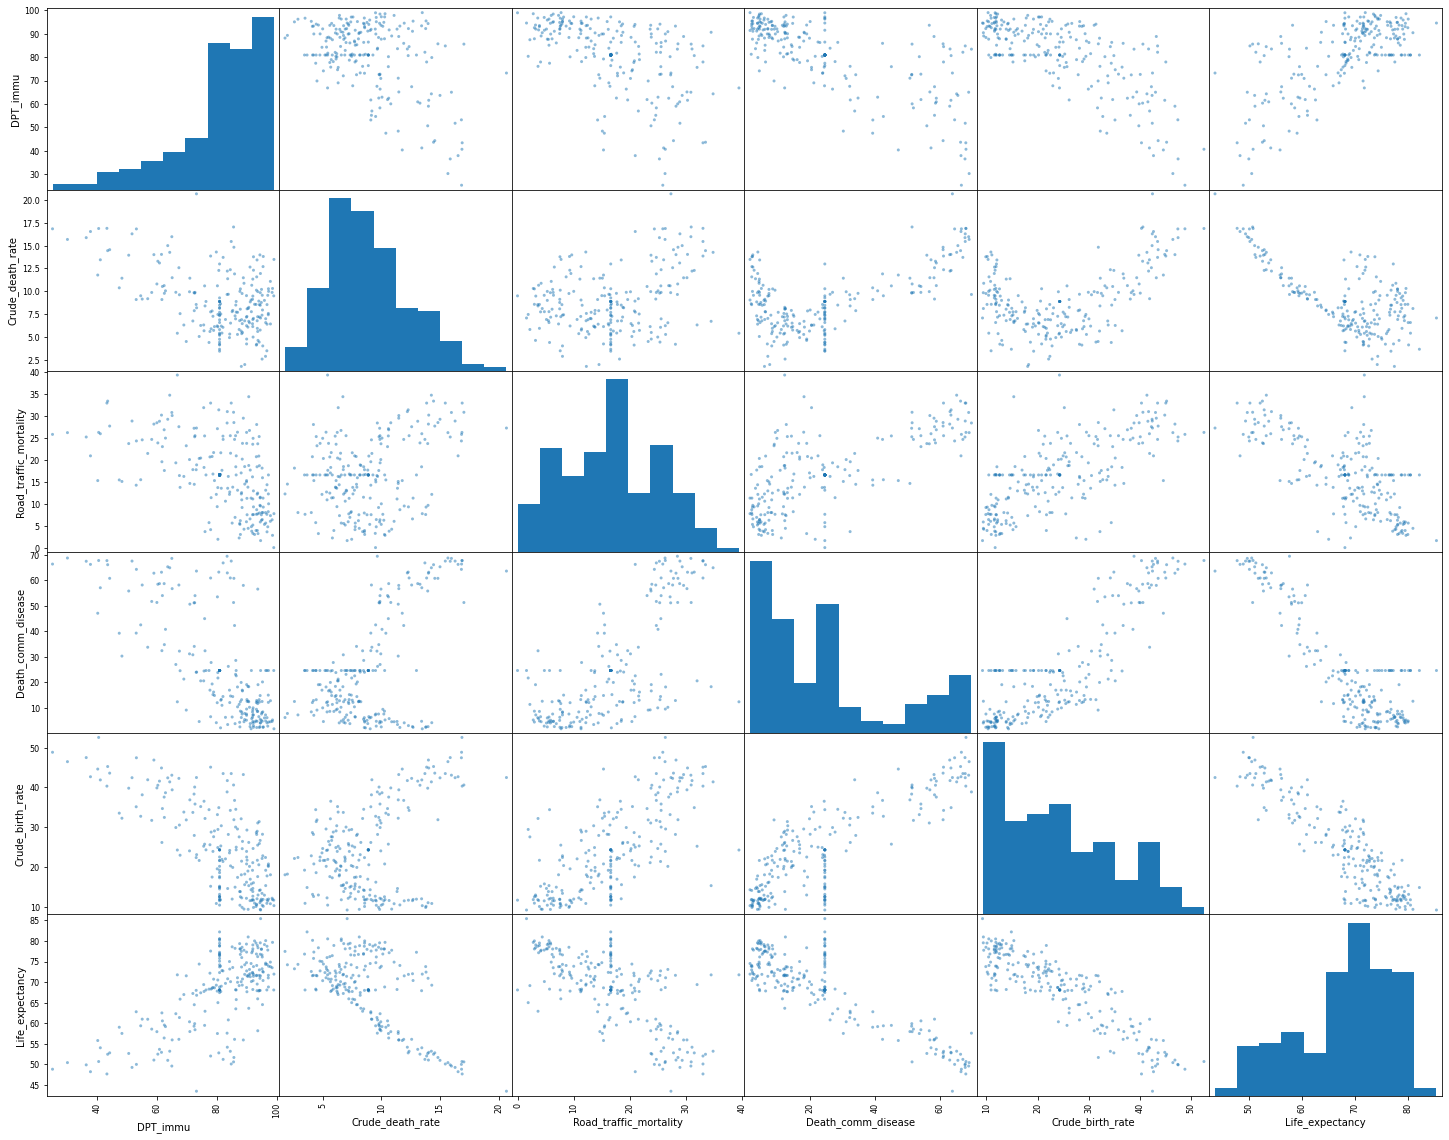

In [51]:
# scatter plot matrix
scatter_matrix(df, figsize = (25,20))
plt.show()

In [52]:
#first lets work on multiple linear regression
#assign dependent and predictor variable columns
#birth, fertility and TB
X = df[['DPT_immu', 'Crude_death_rate', 'Road_traffic_mortality','Death_comm_disease','Crude_birth_rate']]
y = df[['Life_expectancy']]


In [53]:
#verify correct dataset is chosen
X.head()

,DPT_immu,Crude_death_rate,Road_traffic_mortality,Death_comm_disease,Crude_birth_rate
0,73.253847,8.194539,18.888738,24.044739,23.121256
1,91.871139,9.123033,7.519247,6.297173,11.854447
2,73.110659,8.559036,17.779256,23.963126,22.383797
3,40.333333,11.779111,15.300000,47.150000,44.612306
4,96.694444,6.403139,14.350000,4.100000,17.783806


In [54]:
#verify correct dataset is chosen
y.head()

,Life_expectancy
0,66.801882
1,77.548180
2,67.995788
3,55.812556
4,74.286556


In [55]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
#fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
#predicting  the test set result
y_pred = regressor.predict(X_test)

In [58]:
#print predicted values
#y_pred

In [59]:
#get r-squared values, a metric to show accuracy of the model
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [60]:
print(score)

0.9170675631735206


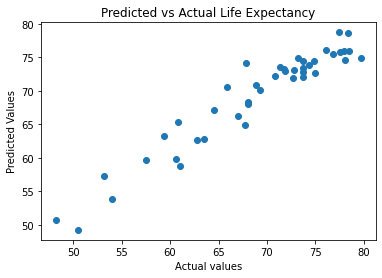

In [61]:
#check scatterplot of predicted and actual life expectancy variable
plt.scatter(y_test, y_pred)
plt.title("Predicted vs Actual Life Expectancy")
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")
plt.show() 

As we can see, the predictions get more accurate as the life expectancy get higher.

In [62]:
#print correlation coefficient of each factor
print(regressor.coef_)

[[-0.02951298 -0.87965913 -0.07817047 -0.05652377 -0.50426535]]


In [63]:
# define new test data
row = [81,9,17,24.6,24.3]


In [64]:
#test the prediction works
print(regressor.predict([[81,9,17,24.6,24.3]]))

[[68.02977256]]


In [65]:
#print Root mean square value 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.7161646811383626
Mean Squared Error: 5.183894883413957
Root Mean Squared Error: 2.276816831327008


Since, RMSE value is quite close to zero, this model appears to be a quite good fit for the data.

# Since, a simple linear regression is not going to cut it, lets try to use ridge regression for the same data.

In [66]:
#https://machinelearningmastery.com/ridge-regression-with-python/

# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
data = df.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 2.168 (0.431)


In [67]:
# fit model
model.fit(X, y)


Ridge()

In [68]:
# define new data
row = [81,9,17,24.6,24.3]


In [69]:
#len(row)

In [70]:
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 67.973


# Gradient boosting regression

#https://www.datatechnotes.com/2019/06/gradient-boosting-regression-example-in.html
Gradient Boosting Regression Example in Python
The idea of gradient boosting is to improve weak learners and create a final combined prediction model. Decision trees are mainly used as base learners in this algorithm. The weak learner is identified by the gradient in the loss function. The prediction of a weak learner is compared to actual value and error is calculated. Based on this error, the model can determine the gradient and change the parameters to decrease the error rate in the next training.
In this tutorial, we'll learn how to predict regression data with the Gradient Boosting Regressor (comes in sklearn.ensemble module) class in Python. The post covers:
Preparing data
Defining the model
Predicting test data and visualizing the result
We'll start by loading the required libraries.

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [74]:
# load the dataset
data = df.values
X, y = data[:, :-1], data[:, -1]


In [75]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.15)

In [76]:
# with new parameters
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)

In [77]:
# with default parameters
gbr = GradientBoostingRegressor()


In [78]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [79]:
ypred = gbr.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("MSE: %.2f" % mse)

MSE: 3.21


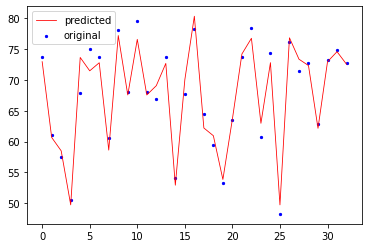

In [83]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [81]:
# make a prediction
yhat = gbr.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 67.332
